#### CANB8347 Machine Learning Project
Trying out supervised ML methods on pre-cleaned dataset

In [2]:
import numpy as np
import pandas as pd
import scipy as sc

# sklearn tools
from sklearn.preprocessing import normalize
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# plotting tools
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style = 'white')
%matplotlib inline

In [50]:
# read in data that has been preprocessed to only contain numeric values
vlbw = pd.read_csv('data/vlbw_train_numeric.csv')

pull out labels for data as the column that we want to predict (live births)  
then, drop that column from the training data to ignore it in our algorithms

In [51]:
labels = vlbw['dead']
vlbw.drop('dead', axis=1, inplace=True)

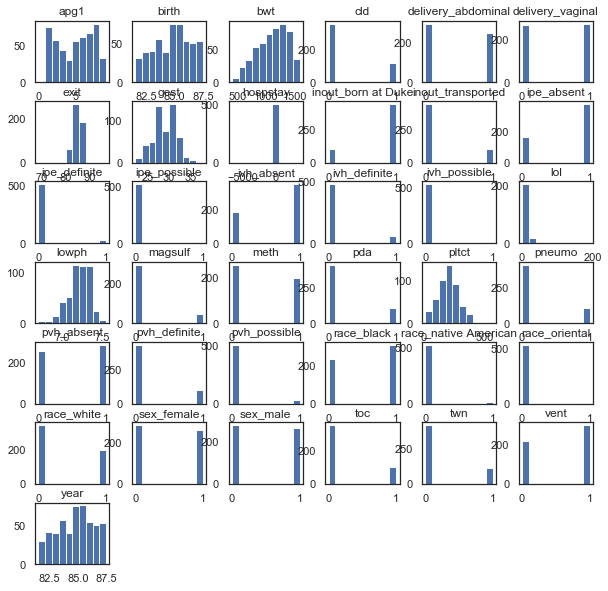

In [6]:
vlbw.hist(figsize=(10,10), grid=False)
plt.show()

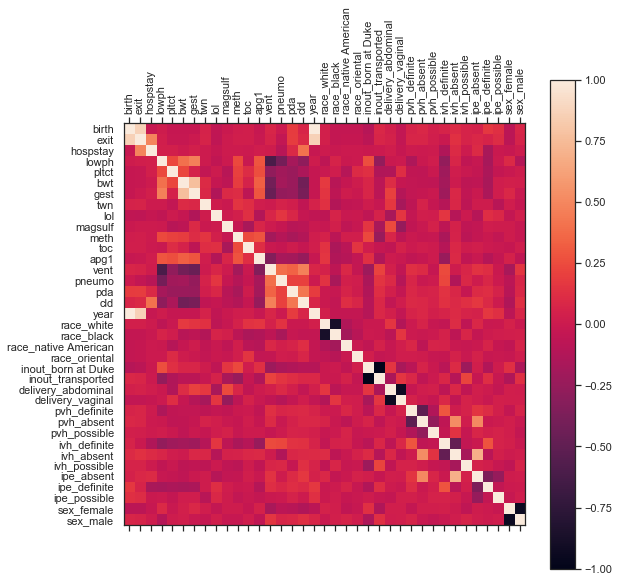

In [52]:
# plot correlation matrix for all features in numeric dataset
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111)
cax = ax.matshow(vlbw.corr(), vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(vlbw.columns),1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(vlbw.columns)
plt.xticks(rotation='vertical')
ax.set_yticklabels(vlbw.columns)
plt.show()

impute missing values with mode of each feature  
might not be the best strategy for dealing with `NaN`s, but good for first-pass

In [8]:
# fill NaNs with mode value of each column
vlbw_filled = SimpleImputer(strategy='most_frequent').fit_transform(vlbw)

In [9]:
# normalize each column to fractional representation between 0 and 1
vlbw_filled_norm = normalize(vlbw_filled, axis=1, norm='l1')

In [10]:
vlbw_filled_norm.shape

(537, 37)

In [11]:
def kfold_split(data, labels, n_splits, seed=None, shuffle=True):
        '''split obs using k-fold strategy to cross-validate'''
        kf = KFold(n_splits=n_splits, shuffle=shuffle, random_state=seed) # generate KFold object for splitting data
        splits = {'train':{'data':[],'labels':[]}, 'test':{'data':[],'labels':[]}} # initiate empty dictionary to dump matrix subsets into

        for train_i, test_i in kf.split(data):
            splits['train']['data'].append(data[train_i,:])
            splits['train']['labels'].append(labels[train_i])
            splits['test']['data'].append(data[test_i,:])
            splits['test']['labels'].append(labels[test_i])

        return splits

In [12]:
vlbw_splits = kfold_split(vlbw_filled_norm, labels, 5, seed=18)

In [13]:
for i in range(0,len(vlbw_splits['test']['data'])):
    print(i)

0
1
2
3
4


---
Try some supervised ML algorithms on the training data and labels

In [59]:
lda = LinearDiscriminantAnalysis(n_components=2, solver='eigen')
vlbw_lda_fit = lda.fit(X=vlbw_filled_norm, y=labels)
vlbw_lda = vlbw_lda_fit.predict(vlbw_filled_norm)

In [60]:
vlbw_lda

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

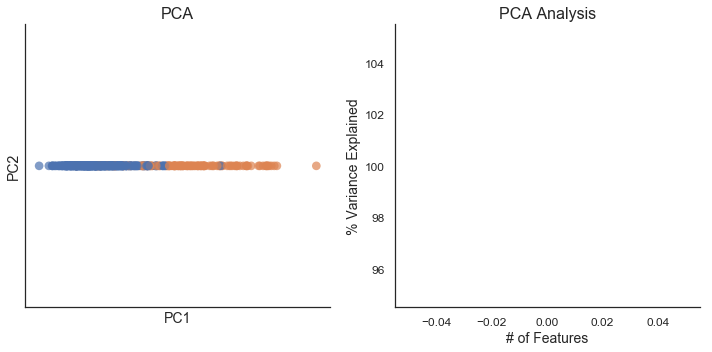

In [31]:
# plot LDA results for first two components, colored by desired label (live birth)
plt.figure(figsize=(10,5))

plt.subplot(121)
sns.scatterplot(x=vlbw_lda[:,0], y=0, s=75, alpha=0.7, hue=labels, legend=None, edgecolor='none')
plt.tick_params(labelbottom=False, labelleft=False)
plt.ylabel('PC2', fontsize=14)
plt.xlabel('PC1', fontsize=14)
plt.title('PCA', fontsize=16)

plt.subplot(122)
plt.plot(np.cumsum(np.round(vlbw_lda_fit.explained_variance_ratio_, decimals=3)*100))
plt.tick_params(labelsize=12)
plt.ylabel('% Variance Explained', fontsize=14)
plt.xlabel('# of Features', fontsize=14)
plt.title('PCA Analysis', fontsize=16)

sns.despine()
plt.tight_layout()
plt.show()

In [29]:
# Logistic regression classifier
clf = LogisticRegressionCV(cv=5, random_state=0, multi_class='multinomial', max_iter=1000)

In [43]:
# get score of correct predictions in training data
clf.fit(vlbw_splits['train']['data'][3], vlbw_splits['train']['labels'][3])
prediction = clf.predict(vlbw_splits['test']['data'][3])
score = clf.score(vlbw_splits['test']['data'][3], vlbw_splits['test']['labels'][3])

cm = metrics.confusion_matrix(vlbw_splits['test']['labels'][3], prediction)

Text(0.5, 1.0, 'Accuracy Score: 0.85')

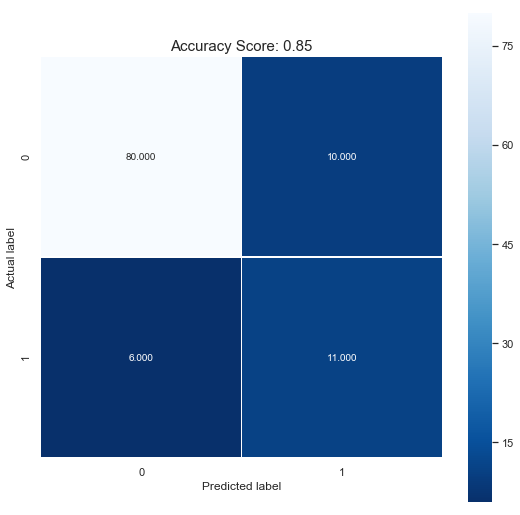

In [50]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(np.round(score,3))
plt.title(all_sample_title, size = 15)
plt.show()

In [12]:
# KNN classifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(vlbw_splits['train']['data'][2], vlbw_splits['train']['labels'][2])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [13]:
# get score of correct predictions in training data
neigh.score(vlbw_splits['test']['data'][2], vlbw_splits['test']['labels'][2])

0.8317757009345794